# 911 Calls  Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

In [2]:
import numpy as np
import pandas as pd

** Importing visualization libraries **

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('911.csv') #Read the Input File

** Checking the head of df **

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df['year']=df['timeStamp'].apply(lambda x: x.split('-')[0]) # To extract the year from the Timestamp
df['month']=df['timeStamp'].apply(lambda x: x.split('-')[1])# To extract the month from the Timestamp

In [7]:
df=df[df['year']=='2016'] # Performing the data analysis in year 2016

## Basic Questions

** In the titles column there are "Reasons" specified before the title code. **

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [35]:
df['Reason']=df['title'].apply(lambda x:x.split(':')[0]) # To extract the Reason from the title column

In [10]:
#To fill in the missing zipcodes
df['zip'].fillna(value=0,inplace=True) 
df['zipi']=df['zip'].astype(int).astype(str)

In [11]:
# To split on the character '-'
df['Detailed Reason']=df['Detailed Reason'].apply(lambda x: x.split('-')[0])

In [12]:
#Top 10 Detailed Reasons for 911 calls in the year 2016
df['Detailed Reason'].value_counts().head(10)

 VEHICLE ACCIDENT         33490
 DISABLED VEHICLE         10426
 VEHICLE ACCIDENT          8142
 FIRE ALARM                8016
 RESPIRATORY EMERGENCY     7166
 FALL VICTIM               7063
 CARDIAC EMERGENCY         7063
 ROAD OBSTRUCTION          4383
 SUBJECT IN PAIN           3942
 HEAD INJURY               3770
Name: Detailed Reason, dtype: int64

In [13]:
#To convert it to the column zipcode to type zipcode by importing the zipcode package.

import zipcode
#.apply is always faster than for loop
df['zipi']=df['zipi'].apply(lambda x: zipcode.isequal(x))

#It takes quite a few minutes. Any suugestions here are welcome
# for i in range(len(df['zipi'])):
#     df.iloc[i,13]=zipcode.isequal(df.iloc[i,13])

In [17]:
#To get the state from where each call originated
df['state']=df['zipi'].apply(lambda x:x.state if x!=None else 0)

** What are the top 5 zipcodes for 911 calls? **

In [18]:
#To group by States, Reasons:[df['Reasons].unique()] and Detailed Reasons
a=df.groupby(['state','Reason','Detailed Reason']).count()

In [19]:
#Top 5 zipcodes from where calls originated.
#0 represents missing value/ where zipcode was not available
#Planning to use the address in the desc field to get the county to obtain the missing values in the next version
print(df['zip'].value_counts().head())

0.0        17865
19401.0     9879
19464.0     9625
19403.0     7034
19446.0     6794
Name: zip, dtype: int64


** What are the top 5 townships (twp) for 911 calls? **

In [23]:
df['twp'].value_counts().head()

LOWER MERION    12332
ABINGTON         8536
NORRISTOWN       8331
UPPER MERION     7425
CHELTENHAM       6610
Name: twp, dtype: int64

** A look at the 'title' column, how many unique title codes are there? **

In [24]:
df['title'].nunique()

119

## Creating new features

** What is the most common Reason for a 911 call based off of Reasons new column? **

In [36]:
df['Reason'].value_counts()

EMS        70127
Traffic    50656
Fire       21577
Name: Reason, dtype: int64

** Plot of 911 calls by Reason. **

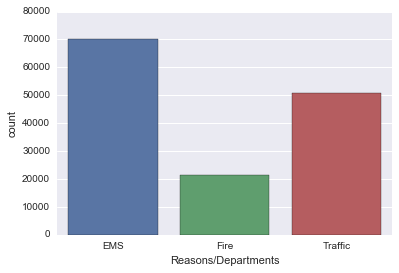

In [37]:
sns.countplot(df['Reasons/Departments'])

** Timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [38]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

** We can now grab specific attributes from a Datetime object by calling them.**

In [39]:
df['Hour']=df['timeStamp'].apply(lambda x: x.hour)
df['Month']=df['timeStamp'].apply(lambda x: x.month)
df['Day of Week']=df['timeStamp'].apply(lambda x:x.weekday())

** Mapping the actual string names to the day of the week: **



In [40]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']=df['Day of Week'].map(dmap)

** Plot of the Day of Week column based off of the Reason column. **

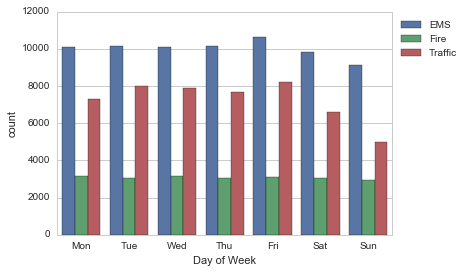

In [46]:
sns.set_style('whitegrid')
sns.countplot(x='Day of Week',data=df,hue='Reason',order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

** Same for Month:**

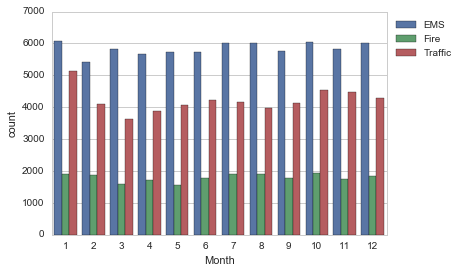

In [47]:
sns.set_style('whitegrid')
sns.countplot(x='Month',data=df,hue='Reason')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

** Group the DataFrame by the month column **

In [48]:
byMonth=df.groupby('Month').count()
byMonth.head(12)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,year,month,Reason,Detailed Reason,zipi,state,Reasons/Departments,Hour,Day of Week
Month,,,,,,,,,,,,,,,,,,
1,13096,13096,13096,13096,13096,13096,13094,13096,13096,13096,13096,13096,13096,11512,13096,13096,13096,13096
2,11396,11396,11396,11396,11396,11396,11395,11396,11396,11396,11396,11396,11396,9926,11396,11396,11396,11396
3,11059,11059,11059,11059,11059,11059,11052,11059,11059,11059,11059,11059,11059,9754,11059,11059,11059,11059
4,11287,11287,11287,11287,11287,11287,11284,11287,11287,11287,11287,11287,11287,9897,11287,11287,11287,11287
5,11374,11374,11374,11374,11374,11374,11371,11374,11374,11374,11374,11374,11374,9938,11374,11374,11374,11374
6,11732,11732,11732,11732,11732,11732,11726,11732,11732,11732,11732,11732,11732,10205,11732,11732,11732,11732
7,12088,12088,12088,12088,12088,12088,12086,12088,12088,12088,12088,12088,12088,10626,12088,12088,12088,12088
8,11904,11904,11904,11904,11904,11904,11902,11904,11904,11904,11904,11904,11904,10381,11904,11904,11904,11904
9,11669,11669,11669,11669,11669,11669,11666,11669,11669,11669,11669,11669,11669,10174,11669,11669,11669,11669


** Simple plot off of the dataframe indicating the count of calls per month. **

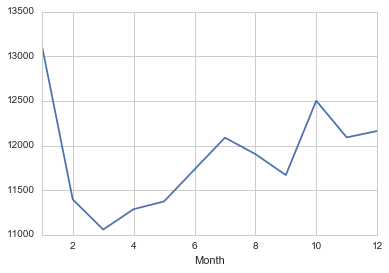

In [49]:
byMonth['Reason'].plot()

** Create a linear fit on the number of calls per month **

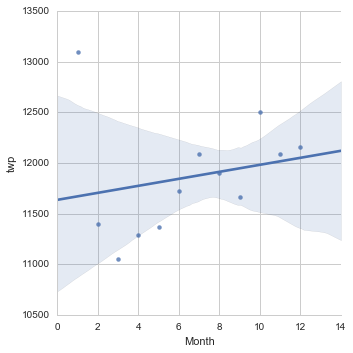

In [50]:
byMonth.reset_index(inplace=True)
byMonth.head()
sns.lmplot(x='Month',y='twp',data=byMonth)

**Creating a new column called 'Date' that contains the date from the timeStamp column. ** 

In [51]:
df['Date']=df['timeStamp'].apply(lambda x: x.date())

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

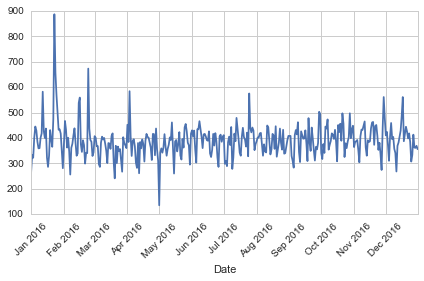

In [52]:
df.groupby('Date').count()['twp'].plot()
plt.xticks(rotation=45)
plt.tight_layout()


** Recreating this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

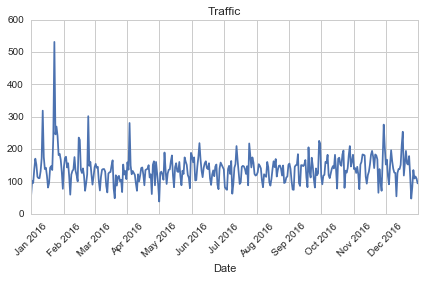

In [54]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title("Traffic")
plt.xticks(rotation=45)
plt.tight_layout()

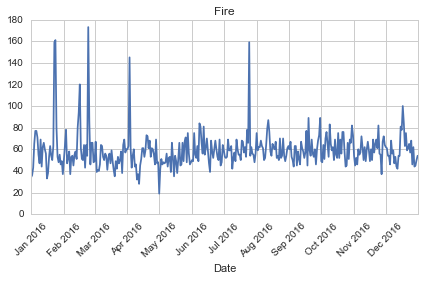

In [55]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title("Fire")
plt.xticks(rotation=45)
plt.tight_layout()

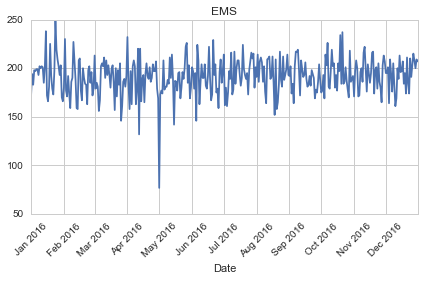

In [56]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title("EMS")
plt.xticks(rotation=45)
plt.tight_layout()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. **

In [57]:
df.reset_index(inplace=True)

In [58]:
df.set_index('Day of Week',inplace=True,drop=True)
a=df['Hour'].groupby(level='Day of Week').value_counts()
a.head()
b=a.unstack(level=-1)
b.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,385,345,307,286,268,324,608,950,1075,1159,...,1323,1455,1514,1482,1146,1073,953,859,783,652
Mon,382,291,284,253,298,349,566,952,1212,1163,...,1216,1328,1373,1390,1201,1019,859,659,607,438
Sat,542,453,383,367,344,353,391,547,716,974,...,1154,1154,1147,1154,1060,1044,896,794,711,681
Sun,512,451,411,383,315,341,380,542,661,872,...,990,978,961,1013,990,937,737,662,536,488
Thu,397,284,308,234,256,333,563,973,1161,1237,...,1244,1380,1330,1487,1169,1016,857,764,606,485


** Creating a HeatMap using this new DataFrame. **

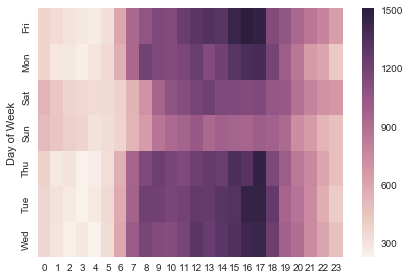

In [59]:
sns.heatmap(b)
plt.tight_layout()

** Creating a clustermap using this DataFrame. **

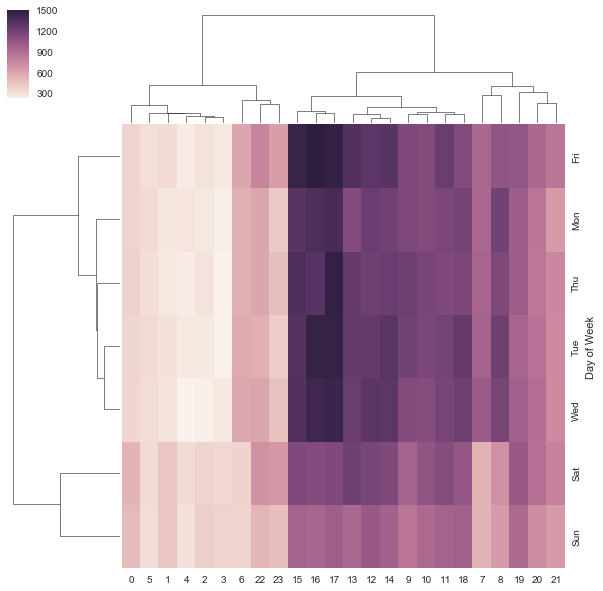

In [60]:
sns.clustermap(b)

** For a DataFrame that shows the Month as the column. **

In [61]:
d=df['Month'].groupby(level='Day of Week').value_counts().unstack(level=-1)
d.head()

,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,1950,1564,1521,1949,1725,1647,2042,1740,2195,1901,1699,2058
Mon,1718,1959,1534,1594,1776,1609,1685,1865,1552,2042,1682,1526
Sat,2253,1435,1264,1736,1438,1376,1691,1423,1406,1935,1516,2015
Sun,1947,1223,1097,1486,1413,1329,1667,1360,1235,1757,1281,1273
Thu,1584,1582,1883,1592,1585,2055,1642,1579,2165,1625,1630,2002


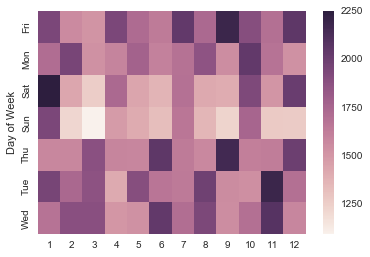

In [62]:
sns.heatmap(d)

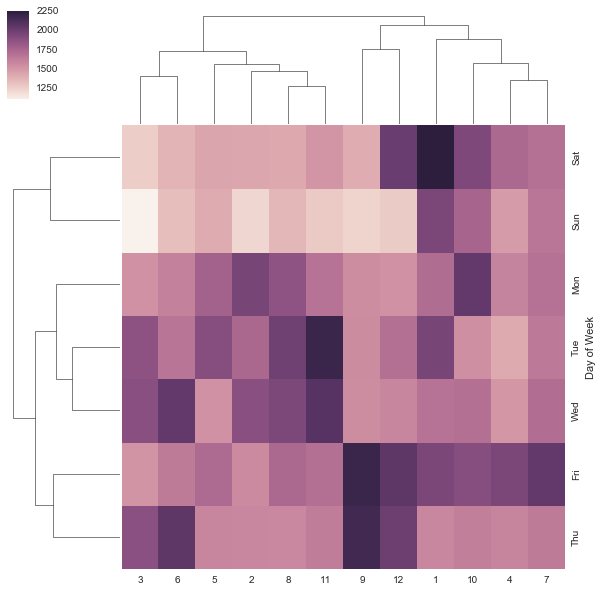

In [64]:
sns.clustermap(d)

## Thank You